<a href="https://colab.research.google.com/github/Padmashree02/Image_Classification-DenseNet121/blob/main/Main_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
#imported required libraries

import cv2
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline

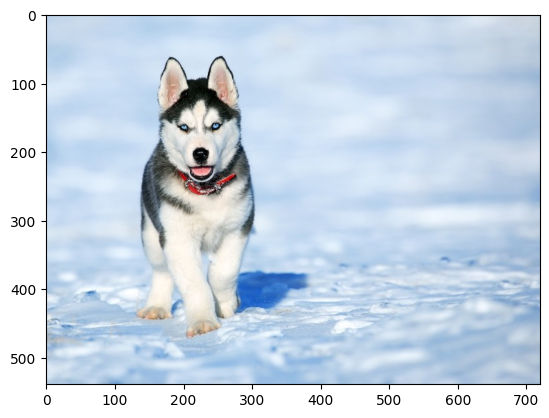

In [11]:
#Load the image for the input data purpose
input=cv2.imread('/content/Dog.jpg')

#Display the image by swaping BGR to RGB format
plt.imshow(input[:,:,::-1])

In [14]:
#Read the class names
with open ('/content/classification_classes_ILSVRC2012.txt','r') as f:
  image_net_names=f.read().split('\n')

#extracting the class names
class_names=image_net_names[:-1]

print(class_names[100])
#Results => Name, scientific name

black swan, Cygnus atratus


In [15]:
#Load the model
config_file='/content/DenseNet_121.prototxt'  #text file- network configuration
model_file='/content/DenseNet_121.caffemodel' #binary file - trained weights

#read the model or neural network
model=cv2.dnn.readNet(model=model_file,config=config_file, framework='Caffe')

In [16]:
#convert the image into network understanding format (blob)
blob= cv2.dnn.blobFromImage(image=input, scalefactor=0.017, size=(224,224), mean=(104,117,123), swapRB=False, crop=False,)

#Set the input data to the DenseNet model
model.setInput(blob)

#Pass the blob Forward to the DenseNet model
outputs=model.forward()

Eskimo dog, husky with 83.393 %


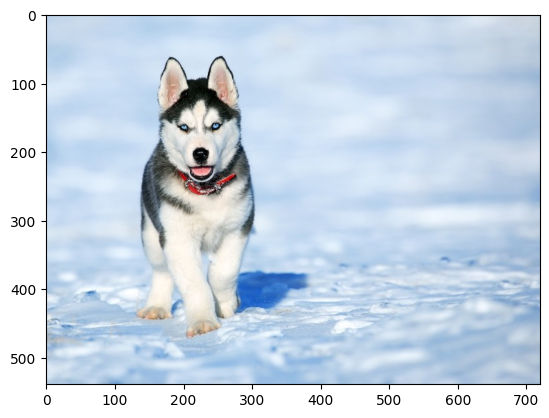

In [18]:
#Extract the first layer from the output layers
final_outputs=outputs[0]  #0 is first layer of the output layers

#Flatten the extracted layer wrt the number of classes
final_outputs=final_outputs.reshape(1000,1)

#extract the class's index that has maximum score
label_idx=np.argmax(final_outputs)

#Convert the score into probability
probs=np.exp(final_outputs)/np.sum(np.exp(final_outputs))
#print(np.max(probs*100))

#Display the image classification result of the image
result=f"{class_names[label_idx]} with {np.max(probs*100):.3f} %"
plt.imshow(input[:,:,::-1])
print(result)